In [53]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.backend_bases

In [105]:
df= pd.read_csv('train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
from termcolor import colored
print('Shape of given dataset: \n \n',df.shape)
print('-'*90)

print('No.of records in the given dataset: \n \n', df.shape[0])
print('-'*90)

print('Checking for missing value: \n \n', df.isnull().sum())
print('-'*90)

print('Analysing type of columns: \n \n', df.dtypes)
print('-'*90)

print('Analysing unique values in each column: \n \n', df.nunique())
print('-'*90)

Shape of given dataset: 
 
 (614, 13)
------------------------------------------------------------------------------------------
No.of records in the given dataset: 
 
 614
------------------------------------------------------------------------------------------
Checking for missing value: 
 
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
------------------------------------------------------------------------------------------
Analysing type of columns: 
 
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           floa

## EDA

In [8]:
#!pip install pandas-profiling

In [9]:
from pandas_profiling import ProfileReport
profile= ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


Loan_Status
N    192
Y    422
Name: Loan_Status, dtype: int64


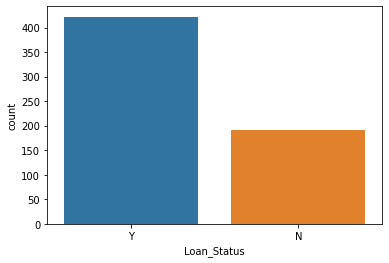

In [88]:
sns.countplot(data=df, x='Loan_Status')
print(df.groupby(['Loan_Status'])['Loan_Status'].count())

### Missing Values

<AxesSubplot:>

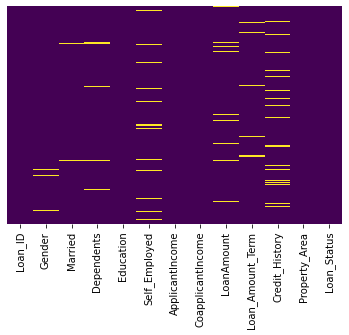

In [89]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [74]:
num_variable= [col for col in df.columns if df[col].dtypes !='O']
cat_variable= [col for col in df.columns if df[col].dtypes =='O']
dis_variable=[col for col in num_variable if len(df[col].unique())<25 and col not in ['Loan_ID']]
print('Catogerical features: \n', cat_variable)
print('Numerical features: \n', num_variable)
print('Discrete features: \n', dis_variable)

Catogerical features: 
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Numerical features: 
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Discrete features: 
 ['Loan_Amount_Term', 'Credit_History']


In [59]:
feature_nan=[feat for feat in df.columns if df[feat].isnull().sum()>1]
feature_cat_nan= [feat for feat in cat_variable if df[feat].isnull().sum()>1]
feature_num_nan= [feat for feat in num_variable if df[feat].isnull().sum()>1]
print('Catogerical features with missing values: \n', feature_cat_nan)
print('Numerical features with missing values: \n', feature_num_nan)

Catogerical features with missing values: 
 ['Gender', 'Married', 'Dependents', 'Self_Employed']
Numerical features with missing values: 
 ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


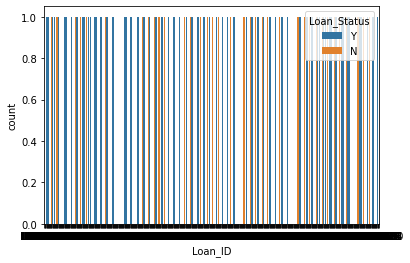

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


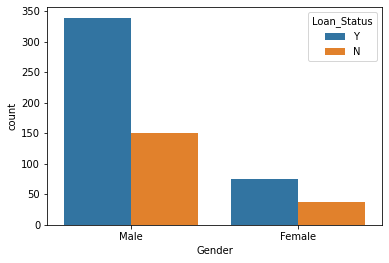

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


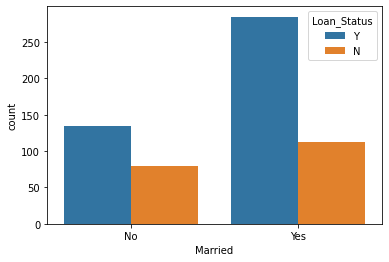

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


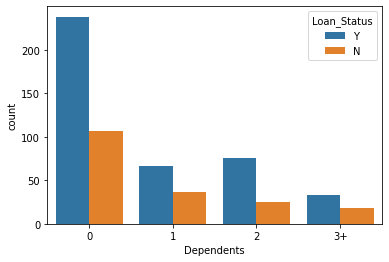

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


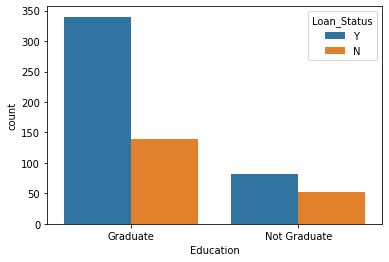

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


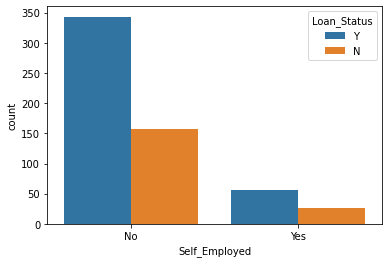

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


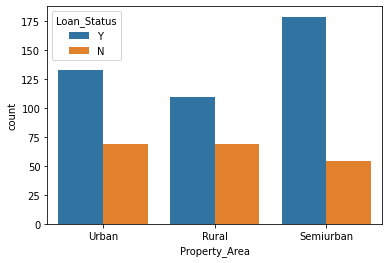

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


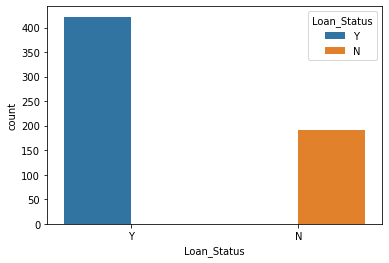

In [65]:
# Analysing relationship of cat features with target
for feature in cat_variable:
    data=df.copy()
    sns.countplot(data[feature], hue=data['Loan_Status'])
    plt.show()

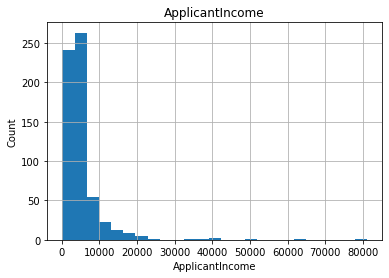

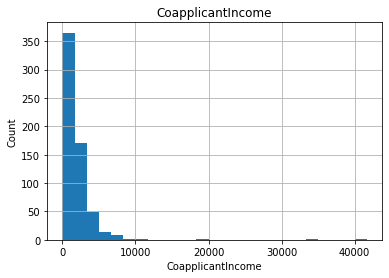

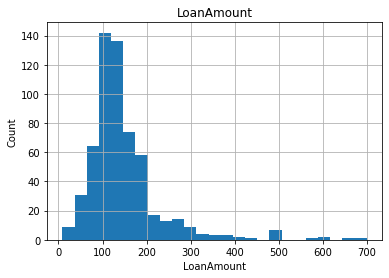

In [76]:
continous_feature= [col for col in num_variable if col not in dis_variable]
for feature in continous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

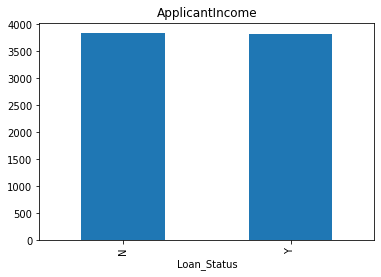

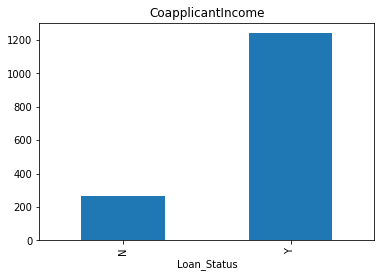

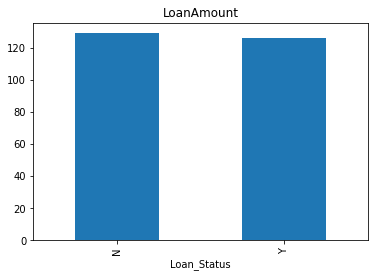

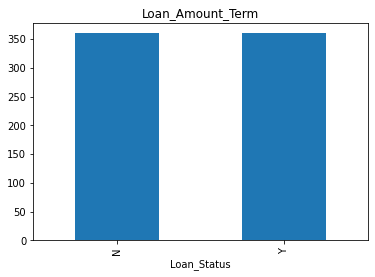

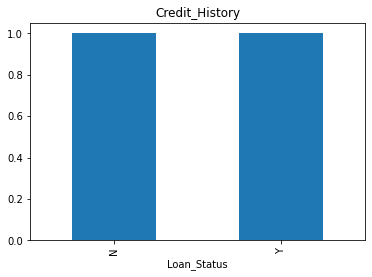

In [72]:
for feat in num_variable:
    data= df.copy()
    data.groupby(['Loan_Status'])[feat].median().plot.bar()
    plt.title(feat)
    plt.show()

In [70]:
df.groupby(['Loan_Status'])['LoanAmount'].median()

Loan_Status
N    129.0
Y    126.0
Name: LoanAmount, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


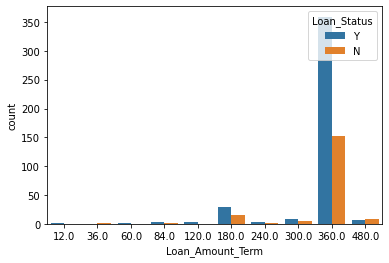

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


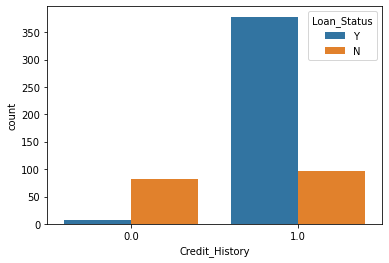

In [75]:
for feature in dis_variable:
    data=df.copy()
    sns.countplot(data[feature], hue=data['Loan_Status'])
    plt.show()

## Outliers

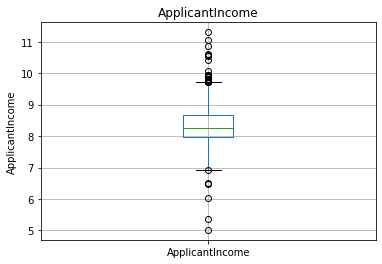

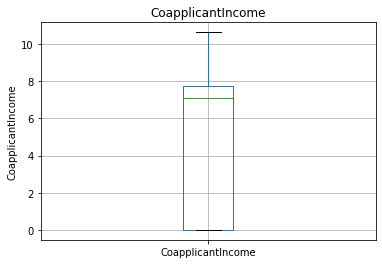

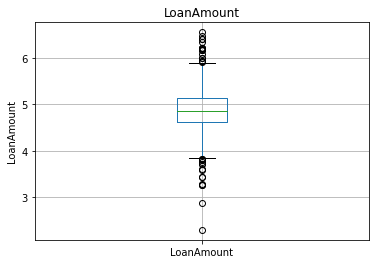

In [78]:
for feature in continous_feature:
    data= df.copy()
    data[feature]= np.log1p(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [106]:
## Replacing the numerical Missing Values

for feature in feature_num_nan:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[feature_num_nan].isnull().sum()

LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
dtype: int64

In [93]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountnan,Loan_Amount_Termnan,Credit_Historynan
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,0,0,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,0,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,0,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,0,0


In [94]:
df.isnull().sum()

Loan_ID                 0
Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed          32
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
LoanAmountnan           0
Loan_Amount_Termnan     0
Credit_Historynan       0
dtype: int64

In [107]:
#filling missing values
df= df.fillna(df.mode().iloc[0])
df.isnull().sum().any()

False

In [108]:
# encoding catogerical features
for feature in cat_variable:
    labels_ordered=df.groupby([feature])['Loan_Status'].count().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [109]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountnan,Loan_Amount_Termnan,Credit_Historynan
0,0,1,0,3,1,1,5849,0.0,128.0,360.0,1.0,1,1,1,0,0
1,404,1,1,2,1,1,4583,1508.0,128.0,360.0,1.0,0,0,0,0,0
2,405,1,1,3,1,0,3000,0.0,66.0,360.0,1.0,1,1,0,0,0
3,406,1,1,3,0,1,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0
4,407,1,0,3,1,1,6000,0.0,141.0,360.0,1.0,1,1,0,0,0


In [110]:
for feat in continous_feature:
    df[feat]= np.log1p(df[feat])

In [111]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountnan,Loan_Amount_Termnan,Credit_Historynan
0,0,1,0,3,1,1,8.674197,0.000000,4.859812,360.0,1.0,1,1,1,0,0
1,404,1,1,2,1,1,8.430327,7.319202,4.859812,360.0,1.0,0,0,0,0,0
2,405,1,1,3,1,0,8.006701,0.000000,4.204693,360.0,1.0,1,1,0,0,0
3,406,1,1,3,0,1,7.857094,7.765993,4.795791,360.0,1.0,1,1,0,0,0
4,407,1,0,3,1,1,8.699681,0.000000,4.955827,360.0,1.0,1,1,0,0,0


### Scaling

In [112]:
feat_scale= [col for col in df.columns if col not in ['Loan_ID']]
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df_scale= scaler.fit_transform(df[feat_scale])
df_scale= pd.DataFrame(df_scale, columns=df[feat_scale].columns)
df_scale= pd.concat([df['Loan_ID'], df_scale],axis=1)
df_scale

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountnan,Loan_Amount_Termnan,Credit_Historynan
0,0,1.0,0.0,1.000000,1.0,1.0,0.581854,0.000000,0.601711,0.743590,1.0,0.5,1.0,1.0,0.0,0.0
1,404,1.0,1.0,0.666667,1.0,1.0,0.543052,0.688057,0.601711,0.743590,1.0,0.0,0.0,0.0,0.0,0.0
2,405,1.0,1.0,1.000000,1.0,0.0,0.475649,0.000000,0.447563,0.743590,1.0,0.5,1.0,0.0,0.0,0.0
3,406,1.0,1.0,1.000000,0.0,1.0,0.451844,0.730059,0.586647,0.743590,1.0,0.5,1.0,0.0,0.0,0.0
4,407,1.0,0.0,1.000000,1.0,1.0,0.585909,0.000000,0.624304,0.743590,1.0,0.5,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,204,0.0,0.0,1.000000,1.0,1.0,0.470256,0.000000,0.464498,0.743590,1.0,0.0,1.0,0.0,0.0,0.0
610,205,1.0,1.0,0.000000,1.0,1.0,0.525569,0.000000,0.332003,0.358974,1.0,0.0,1.0,0.0,0.0,0.0
611,206,1.0,1.0,0.666667,1.0,1.0,0.633101,0.515610,0.761131,0.743590,1.0,0.5,1.0,0.0,0.0,0.0
612,459,1.0,1.0,0.333333,1.0,1.0,0.623159,0.000000,0.690332,0.743590,1.0,0.5,1.0,0.0,0.0,0.0


### Model Building

In [113]:
X= df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y=df.Loan_Status

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [115]:
print('training data:', X_train.shape[0])
print('testing data:', X_test.shape[0])

training data: 491
testing data: 123


In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
lr= LogisticRegression()
tree= DecisionTreeClassifier()
rf= RandomForestClassifier()
svc= SVC()

In [120]:
# models to evaluate
models_for_checking={'lr':LogisticRegression(),
       'dt':DecisionTreeClassifier(),
       'rf':RandomForestClassifier(),
       'svr':SVC()}

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [122]:
scores_df= pd.DataFrame(scores, columns=['model','score'])
scores_df

,model,score
0,lr,0.813008
1,dt,0.707317
2,rf,0.756098
3,svr,0.650407


In [140]:
models_for_checking={'lr':LogisticRegression(),
       'rf':RandomForestClassifier()}

In [153]:
cv= StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
scores= []
for model_name, model in models_for_checking.items():
    score= cross_val_score(estimator=model, X=X,y=y, cv=cv, error_score='raise', verbose=2)
    scores.append({
        'model':model_name,
        'score':np.mean(score),
        'variance':np.std(score)})

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


In [142]:
scores_df= pd.DataFrame(scores, columns=['model','score', 'variance'])
scores_df

,model,score,variance
0,lr,0.809423,0.012537
1,rf,0.796335,0.030224


## Feature Selection

In [143]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [148]:
X_modified= X.copy()
y_modified= y.copy()
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_modified, y_modified)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [149]:
feature_sel_model.get_support()

array([False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False])

In [150]:
selected_feat = X_modified.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_== 0)))

total features: 14
selected features: 10
features with coefficients shrank to zero: 4


In [151]:
selected_feat

Index(['Married', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'LoanAmountnan'],
      dtype='object')

In [156]:
X_modified= X_modified[selected_feat]
X_modified.shape

(614, 10)

In [154]:
models_for_checking={'lr':LogisticRegression(),
       'rf':RandomForestClassifier()}

In [157]:
cv= StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
scores= []
for model_name, model in models_for_checking.items():
    score= cross_val_score(estimator=model, X=X_modified,y=y_modified, cv=cv, error_score='raise', verbose=2)
    scores.append({
        'model':model_name,
        'score':np.mean(score),
        'variance':np.std(score)})

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished


In [158]:
scores_df= pd.DataFrame(scores, columns=['model','score', 'variance'])
scores_df

,model,score,variance
0,lr,0.807770,0.019493
1,rf,0.799587,0.028281
